# Dinámica en un sistema rotante

In [56]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from numpy.linalg import norm
%matplotlib inline

# Matriz de Rotación
def rotationMatrix(t,axis):
    R=identity(3)
    r=array([[cos(t),sin(t)],[-sin(t),cos(t)]])
    if axis=='z':R[0:2,0:2]=r
    elif axis=='x':R[1:3,1:3]=r
    else:
        R[0,0]=r[0,0];R[0,2]=r[0,1]
        R[2,0]=r[1,0];R[2,2]=r[1,1]
    return R

# Ecuaciones de movimiento

In [57]:
def aceleracion(r,v,t):
    return array([0,0,0])

def eom(y,t,parametros):
    w=parametros["w"]
    dwdt=parametros["dwdt"]
    
    r=y[0:3]
    v=y[3:6]
    
    drdt=v
    
    centrifuga=-cross(w,cross(w,r))
    coriolis=-2*cross(w,v)
    euler=-cross(dwdt,r)
    
    dvdt=aceleracion(r,v,t)+centrifuga+coriolis+euler
    
    return drdt.tolist()+dvdt.tolist()

# Condiciones iniciales

In [78]:
w = array([0,0,1])
dwdt = array([0,0,0])

parametros=dict(w=w,dwdt=dwdt)

# Estas son las condiciones iniciales en el sistema rotante
r=array([0,0,0])
v=array([1,1,0])
y=concatenate((r,v))

# Integración

In [79]:
Nt = 100
ts = linspace(0,10,Nt)

solucion=odeint(eom,y,ts,args=(parametros,))

rs=solucion[:,0:3]
vs=solucion[:,3:6]

# Gráfica

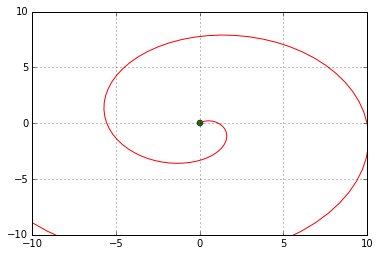

In [80]:
fig2d = plt.figure()
ax=fig2d.gca()
ax.plot([0],[0],'+')

ax.plot(rs[0,0],rs[0,1],'o')
ax.plot(rs[:,0],rs[:,1])

ext=10
ax.set_xlim((-ext,ext))
ax.set_ylim((-ext,ext))
ax.grid()

# Transformación al sistema no rotante

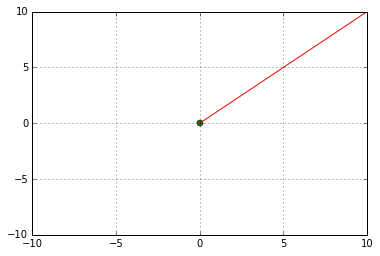

In [81]:
# Rotación
rnrs=zeros_like(rs)
for i in xrange(Nt):
    teta=w[2]*ts[i]+0.5*dwdt[2]*ts[i]**2
    Rtot=rotationMatrix(-teta,'z')
    rnrs[i]=Rtot.dot(rs[i])

# Gráfico
fig2d = plt.figure()
ax=fig2d.gca()
ax.plot([0],[0],'+')

ax.plot(rnrs[0,0],rnrs[0,1],'o')
ax.plot(rnrs[:,0],rnrs[:,1])

ext=10
ax.set_xlim((-ext,ext))
ax.set_ylim((-ext,ext))
ax.grid()    